## Linear SVM
Let's train an SVM model to classify the different flowers in our Iris dataset

In [1]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], 
                    marker=markers[idx], label=cl, edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, 
                    linewidth=1, marker='o', s=100, label='test set')

In [3]:
#Load the dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print("Class labels: ", np.unique(y)) #the Iris flower class names, Iris-setosa Iris-versicolor, and Iris-virginica (0, 1, 2).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# Standardize the dataset
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# Combine the training and test datasets
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test)) 

Class labels:  [0 1 2]


C:\Users\promar\AppData\Local\Temp\ipykernel_9112\3167664362.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


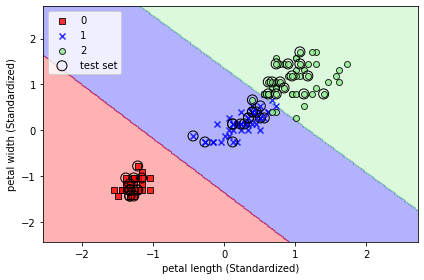

In [4]:
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm, test_idx=range(105, 150))
plt.xlabel("petal length (Standardized)")
plt.ylabel("petal width (Standardized)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

When our data are too large to fit in the memory, we use the `SGDClassifier` that supports online training via `partial_fit` method.

We could initialize the SGD version of the perceptron, logistic regression, and an SVM with default parameters, as follows

In [ ]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss="perceptron")
lr  = SGDClassifier(loss='lr')
svm = SGDClassifier(loss='hinge')

## Non-linear SVM
Train a non-linear SVM model on artificial data based on XOR function

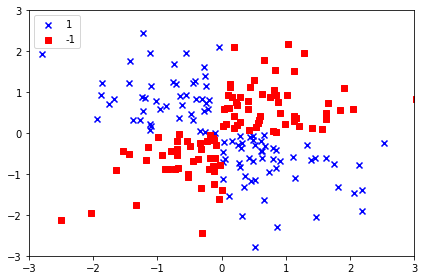

In [5]:
# Create dataset
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1,1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\promar\AppData\Local\Temp\ipykernel_9112\3167664362.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


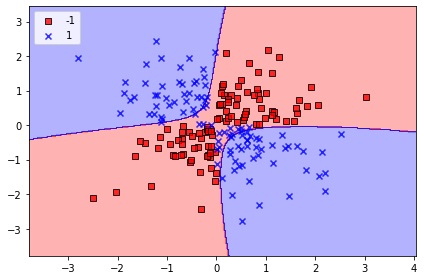

In [6]:
# Train SVM model with RBF kernel
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10) # The gamma parameter can be understood as a cut-off parameter for the Gaussian sphere.
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Let's apply an RBF kernel SVM to our Iris flower dataset

C:\Users\promar\AppData\Local\Temp\ipykernel_9112\3167664362.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


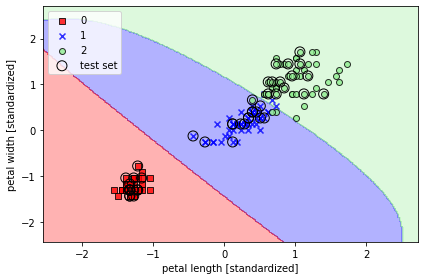

In [7]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Since we chose a relatively small value for 𝛾, the resulting decision boundary of the RBF kernel SVM model will be relatively soft.

Let's try a large value of 𝛾.

C:\Users\promar\AppData\Local\Temp\ipykernel_9112\3167664362.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


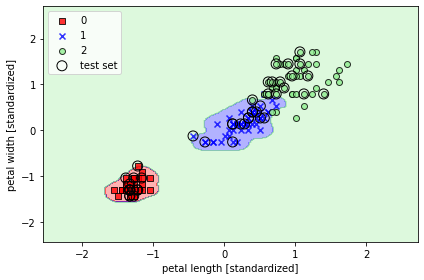

In [8]:
svm = SVC(kernel='rbf', random_state=1, gamma=50, C=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In the resulting plot, we can now see that the decision boundary around the classes 0 and 1 is much tighter using a relatively large value of 𝛾.

**Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. This illustrates that the 𝛾 parameter also plays an important role in controlling overfitting or variance when the algorithm is too sensitive to fluctuations in the training dataset.**